In [1]:
import pandas as pd
import numpy as np
import nltk # naturalLanguageToolKit

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\MAHENDRA
[nltk_data]     PRAJAPATI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MAHENDRA
[nltk_data]     PRAJAPATI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MAHENDRA
[nltk_data]     PRAJAPATI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MAHENDRA
[nltk_data]     PRAJAPATI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Tokenization means diving sentences into words**

In [3]:
from nltk.tokenize import word_tokenize #word_tokenize splits the sentences based on spaces

In [4]:
from nltk.tokenize import RegexpTokenizer

In [5]:
# Lemmitizing, stemming, stopwords
# Stemmer will chop off the suffix like coming become com.
# Lemaatizing will chop off the end word but it will check the resulting word are in dictionary like comin become com
from nltk.corpus import stopwords # Corpus means collection of words like ComputerScience
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('D:/test_jupyter/K8 Reviews v0.2.csv')

In [7]:
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [8]:
df.shape

(14675, 2)

In [9]:
df['review'][1]

"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me."

In [10]:
word_list=[]
for i in df['review']:
    token= word_tokenize(i)
    word_list.append(token)

In [11]:
# Using the RegexpTokenizer
word_list_re=[]
for i in df['review']:
    token=RegexpTokenizer('[a-z|A-Z]+').tokenize(i)
    word_list_re.append(token)

In [12]:
word_list_re

[['Good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['Worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  'Battery',
  'is',
  'draining',
  'like',
  'hell',
  'backup',
  'is',
  'only',
  'to',
  'hours',
  'with',
  'internet',
  'uses',
  'even',
  'if',
  'I',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged',
  'This',
  'is',
  'biggest',
  'lie',
  'from',
  'Amazon',
  'Lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  'MAH',
  'booster',
  'charger',
  'is',
  'fake',
  'it',
  'takes',
  'at',
  'least',
  'to',
  'hours',
  'to',
  'be',
  'fully',
  'charged',
  'Don',
  't',
  'know',
  'how',
  'Lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us',
  'Please',
  'don',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will',
  'regret',
  'like',
  'me'],
 ['when',
  'I',
  'will',
  'get',
  'm

In [13]:
# Removing stopwords
# Stopwords is preposition, pronoun, conjunction, etc.
clean_word_list=[]
for i in word_list_re:
    clean_words=[]
    for j in i:
        if j not in stopwords.words('english'):
            clean_words.append(j)
            #print(clean_words)
    clean_word_list.append(clean_words)

In [14]:
clean_word_list

[['Good', 'need', 'updates', 'improvements'],
 ['Worst',
  'mobile',
  'bought',
  'ever',
  'Battery',
  'draining',
  'like',
  'hell',
  'backup',
  'hours',
  'internet',
  'uses',
  'even',
  'I',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged',
  'This',
  'biggest',
  'lie',
  'Amazon',
  'Lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  'MAH',
  'booster',
  'charger',
  'fake',
  'takes',
  'least',
  'hours',
  'fully',
  'charged',
  'Don',
  'know',
  'Lenovo',
  'survive',
  'making',
  'full',
  'us',
  'Please',
  'go',
  'else',
  'regret',
  'like'],
 ['I', 'get', 'cash', 'back', 'already', 'January'],
 ['Good'],
 ['The',
  'worst',
  'phone',
  'everThey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'Highly',
  'disappointing',
  'amazon'],
 ['Only',
  'I',
  'telling',
  'buyI',
  'totally',
  'disappointedPoor',
  'batteryPoor',
  'cameraWaste',
  'money'],
 ['Phone',
  'awesome'

In [15]:
# Converting into lower case
lcase_words=[]
for i in clean_word_list:
    lower_row=[]
    for j in i:
        lower_row.append(j.lower())
    lcase_words.append(lower_row)

In [16]:
lcase_words

[['good', 'need', 'updates', 'improvements'],
 ['worst',
  'mobile',
  'bought',
  'ever',
  'battery',
  'draining',
  'like',
  'hell',
  'backup',
  'hours',
  'internet',
  'uses',
  'even',
  'i',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged',
  'this',
  'biggest',
  'lie',
  'amazon',
  'lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  'mah',
  'booster',
  'charger',
  'fake',
  'takes',
  'least',
  'hours',
  'fully',
  'charged',
  'don',
  'know',
  'lenovo',
  'survive',
  'making',
  'full',
  'us',
  'please',
  'go',
  'else',
  'regret',
  'like'],
 ['i', 'get', 'cash', 'back', 'already', 'january'],
 ['good'],
 ['the',
  'worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'highly',
  'disappointing',
  'amazon'],
 ['only',
  'i',
  'telling',
  'buyi',
  'totally',
  'disappointedpoor',
  'batterypoor',
  'camerawaste',
  'money'],
 ['phone',
  'awesome'

In [17]:
# Lemmatization 
lemma_col=[]
for i in lcase_words:
    lemma_row=[]
    for j in i:
        lemma_row.append(WordNetLemmatizer().lemmatize(j))
    lemma_col.append(lemma_row)

In [18]:
lemma_col

[['good', 'need', 'update', 'improvement'],
 ['worst',
  'mobile',
  'bought',
  'ever',
  'battery',
  'draining',
  'like',
  'hell',
  'backup',
  'hour',
  'internet',
  'us',
  'even',
  'i',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged',
  'this',
  'biggest',
  'lie',
  'amazon',
  'lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  'mah',
  'booster',
  'charger',
  'fake',
  'take',
  'least',
  'hour',
  'fully',
  'charged',
  'don',
  'know',
  'lenovo',
  'survive',
  'making',
  'full',
  'u',
  'please',
  'go',
  'else',
  'regret',
  'like'],
 ['i', 'get', 'cash', 'back', 'already', 'january'],
 ['good'],
 ['the',
  'worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'highly',
  'disappointing',
  'amazon'],
 ['only',
  'i',
  'telling',
  'buyi',
  'totally',
  'disappointedpoor',
  'batterypoor',
  'camerawaste',
  'money'],
 ['phone',
  'awesome',
  'but

In [19]:
pos_tag=[]
for i in lemma_col:
    pos_tag.append(nltk.pos_tag(i))

In [20]:
pos_tag

[[('good', 'JJ'), ('need', 'NN'), ('update', 'JJ'), ('improvement', 'NN')],
 [('worst', 'RB'),
  ('mobile', 'NN'),
  ('bought', 'VBD'),
  ('ever', 'RB'),
  ('battery', 'RB'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  ('backup', 'IN'),
  ('hour', 'NN'),
  ('internet', 'NN'),
  ('us', 'PRP'),
  ('even', 'RB'),
  ('i', 'VBP'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'JJ'),
  ('getting', 'VBG'),
  ('discharged', 'VBN'),
  ('this', 'DT'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('expected', 'VBD'),
  ('making', 'VBG'),
  ('full', 'JJ'),
  ('saying', 'VBG'),
  ('battery', 'NN'),
  ('mah', 'NN'),
  ('booster', 'NN'),
  ('charger', 'NN'),
  ('fake', 'VBP'),
  ('take', 'VB'),
  ('least', 'JJS'),
  ('hour', 'NN'),
  ('fully', 'RB'),
  ('charged', 'VBN'),
  ('don', 'NN'),
  ('know', 'VBP'),
  ('lenovo', 'JJ'),
  ('survive', 'JJ'),
  ('making', 'VBG'),
  ('full', 'JJ'),
  ('u', 'JJ'),
  ('please', 'NN'),
  ('go', 'VB'),
  ('else'

In [21]:
# NN means noun
# Context analysis through pos tag
noun=[]
for i in pos_tag:
    noun_row=[]
    for j in i:
        if j[1].startswith('NN'):
            noun_row.append(j[0])
    noun.append(noun_row)

In [22]:
noun

[['need', 'improvement'],
 ['mobile',
  'hell',
  'hour',
  'internet',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'mah',
  'booster',
  'charger',
  'hour',
  'don',
  'please',
  'regret'],
 ['cash'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'phone', 'amazon'],
 ['i', 'buyi', 'batterypoor', 'camerawaste', 'money'],
 ['phone',
  'awesome',
  'heat',
  'allot',
  'reason',
  'hate',
  'lenovo',
  'k',
  'note'],
 ['battery', 'level', 'worn'],
 ['problem',
  'phone',
  'problem',
  'lenovo',
  'k',
  'note',
  'service',
  'station',
  'year',
  'warranty',
  'change',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'dont', 'thing', 'option'],
 ['wrost'],
 ['phone', 'charger', 'damage', 'month'],
 ['purchase', 'item', 'heating', 'battery', 'life'],
 ['i', 'battery', 'problem', 'motherboard', 'problem', 'month', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen', 'love'],
 ['headset'],
 ['time'],
 ['product',
  'range',
  'specification',
  'comparison',
  'range',
  'i',
  

In [24]:
np.array(noun,dtype="object").shape

(14675,)

In [ ]:
words=[]
for i in noun:
    for j in i:
        words.append(j)

In [ ]:
str_noun=','.join(words)

In [ ]:
str_noun

'need,improvement,mobile,hell,hour,internet,lie,amazon,lenove,battery,mah,booster,charger,hour,don,please,regret,cash,phone,everthey,phone,problem,phone,amazon,i,buyi,batterypoor,camerawaste,money,phone,awesome,heat,allot,reason,hate,lenovo,k,note,battery,level,worn,problem,phone,problem,lenovo,k,note,service,station,year,warranty,change,phone,lenovo,lot,glitch,dont,thing,option,wrost,phone,charger,damage,month,purchase,item,heating,battery,life,i,battery,problem,motherboard,problem,month,life,phone,slim,battry,backup,screen,love,headset,time,product,range,specification,comparison,range,i,phone,amazon,seal,i,i,credit,card,i,r,deal,amazon,battery,i,solution,battery,life,smartphone,galery,problem,atmos,speaker,phone,camera,speed,feature,excelent,battery,product,product,camera,battery,phone,product,lenovo,option,cast,screen,call,option,doesn,hotspot,phone,usb,cable,phone,price,lenovo,display,specification,function,phone,i,fon,i,speekars,i,phone,issue,color,screen,oreo,battery,heating,prob

In [ ]:
wc=WordCloud(background_color='black',max_words=50000,contour_color='steelblue')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
wc.generate(str_noun)

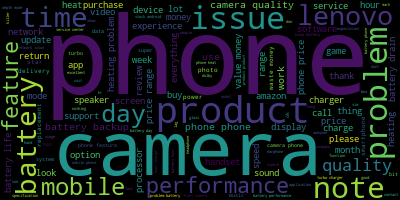

<Figure size 5000x5000 with 0 Axes>

In [ ]:
plt.figure(figsize=(50,50))
wc.to_image()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
noun_list = np.array(noun,dtype='object')
noun_list.shape

(14675,)

In [26]:
str_list=[]
for i in noun:
    str_list.append(','.join(i))

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
feature_vector = CountVectorizer().fit_transform(str_list)

In [30]:
feature_vector

<14675x6455 sparse matrix of type '<class 'numpy.int64'>'
	with 77873 stored elements in Compressed Sparse Row format>

In [31]:
feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Classification And Prediction**

In [32]:
# Splitting the dataset into training and validation set
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(feature_vector,df['sentiment'],test_size=0.2,random_state=10)


In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
nb_mod = MultinomialNB().fit(x_tr,y_tr)

In [38]:
p_tr = nb_mod.predict(x_tr)

In [39]:
p_test= nb_mod.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,p_test)

0.7100511073253833

In [42]:
accuracy_score(y_tr,p_tr)

0.7608177172061329

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_tr,p_tr))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6211
           1       0.77      0.70      0.73      5529

    accuracy                           0.76     11740
   macro avg       0.76      0.76      0.76     11740
weighted avg       0.76      0.76      0.76     11740

